In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, concatenate
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
from keras_preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17464789/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [ ]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(MaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 50)           250000    
                                                                 
 dropout (Dropout)           (None, 400, 50)           0         
                                                                 
 conv1d (Conv1D)             (None, 398, 250)          37750     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 199, 250)         0         
 )                                                               
                                                                 
 dense (Dense)               (None, 199, 250)          62750     
                                                                 
 dropout_1 (Dropout)         (None, 199, 250)          0         
                                         

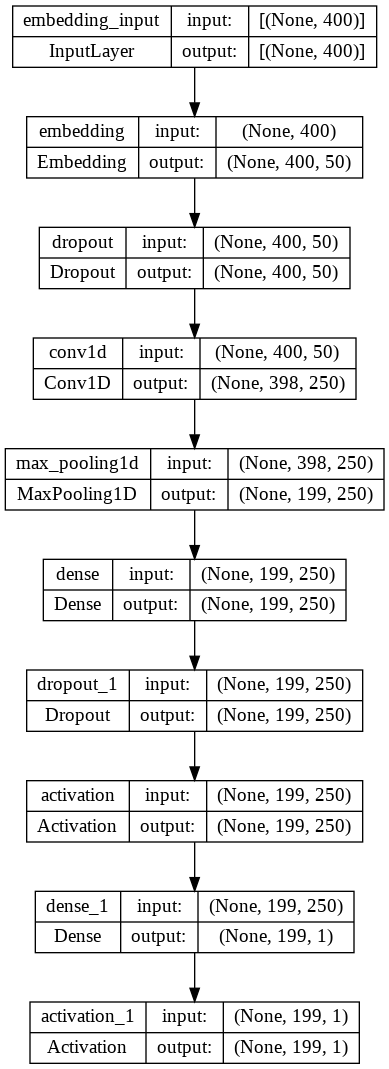

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_acc', mode='max')
callbacks_lst = [checkpoint]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.4965

782/782 [==============================] - 20s 12ms/step - loss: 0.2500 - accuracy: 0.4965 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/15
780/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4999

782/782 [==============================] - 9s 12ms/step - loss: 0.2500 - accuracy: 0.4998 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 3/15
776/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4982

782/782 [==============================] - 11s 14ms/step - loss: 0.2500 - accuracy: 0.4980 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 4/15
780/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4992

782/782 [==============================] - 9s 12ms/step - loss: 0.2500 - accuracy: 0.4992 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 5/15
782/782 [==============================] - ETA: 0s - loss: 0.2501 - accuracy: 0.4990

782/782 [==============================] - 13s 16ms/step - loss: 0.2501 - accuracy: 0.4990 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 6/15
779/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.5002

782/782 [==============================] - 9s 12ms/step - loss: 0.2500 - accuracy: 0.5002 - val_loss: 0.2500 - val_accuracy: 0.5001
Epoch 7/15
777/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.5003

782/782 [==============================] - 9s 11ms/step - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5001
Epoch 8/15
777/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4957

782/782 [==============================] - 9s 11ms/step - loss: 0.2500 - accuracy: 0.4958 - val_loss: 0.2500 - val_accuracy: 0.5003
Epoch 9/15
777/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4980

782/782 [==============================] - 9s 12ms/step - loss: 0.2500 - accuracy: 0.4981 - val_loss: 0.2500 - val_accuracy: 0.5002
Epoch 10/15
776/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4954

782/782 [==============================] - 9s 12ms/step - loss: 0.2500 - accuracy: 0.4954 - val_loss: 0.2500 - val_accuracy: 0.5003
Epoch 11/15
776/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.5037

782/782 [==============================] - 9s 12ms/step - loss: 0.2500 - accuracy: 0.5038 - val_loss: 0.2500 - val_accuracy: 0.5001
Epoch 12/15
777/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4988

782/782 [==============================] - 9s 11ms/step - loss: 0.2500 - accuracy: 0.4988 - val_loss: 0.2500 - val_accuracy: 0.5001
Epoch 13/15
777/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4987

782/782 [==============================] - 9s 11ms/step - loss: 0.2500 - accuracy: 0.4988 - val_loss: 0.2500 - val_accuracy: 0.5001
Epoch 14/15
776/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.5000

782/782 [==============================] - 9s 11ms/step - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5008
Epoch 15/15
778/782 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.4993

782/782 [==============================] - 4s 5ms/step - loss: 0.2500 - accuracy: 0.5006
Test score: 0.24999961256980896
Test accuracy: 0.5006152987480164


In [ ]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(MaxPooling1D())
model.add(Flatten())
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Build model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 50)           250000    
                                                                 
 dropout_4 (Dropout)         (None, 400, 50)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 398, 250)          37750     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 199, 250)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 49750)             0         
                                                                 
 dense_5 (Dense)             (None, 250)               12437750  
                                       

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_acc', mode='max')
callbacks_lst = [checkpoint]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 [==============================] - ETA: 0s - loss: 0.3775 - accuracy: 0.8142

782/782 [==============================] - 21s 16ms/step - loss: 0.3775 - accuracy: 0.8142 - val_loss: 0.2671 - val_accuracy: 0.8892
Epoch 2/15
779/782 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9162

782/782 [==============================] - 12s 15ms/step - loss: 0.2149 - accuracy: 0.9161 - val_loss: 0.2922 - val_accuracy: 0.8796
Epoch 3/15
780/782 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9403

782/782 [==============================] - 9s 11ms/step - loss: 0.1568 - accuracy: 0.9403 - val_loss: 0.2909 - val_accuracy: 0.8796
Epoch 4/15
777/782 [============================>.] - ETA: 0s - loss: 0.1106 - accuracy: 0.9593

782/782 [==============================] - 9s 12ms/step - loss: 0.1105 - accuracy: 0.9592 - val_loss: 0.3533 - val_accuracy: 0.8770
Epoch 5/15
777/782 [============================>.] - ETA: 0s - loss: 0.0662 - accuracy: 0.9761

782/782 [==============================] - 9s 12ms/step - loss: 0.0664 - accuracy: 0.9760 - val_loss: 0.4486 - val_accuracy: 0.8761
Epoch 6/15
779/782 [============================>.] - ETA: 0s - loss: 0.0429 - accuracy: 0.9845

782/782 [==============================] - 9s 11ms/step - loss: 0.0429 - accuracy: 0.9846 - val_loss: 0.5176 - val_accuracy: 0.8757
Epoch 7/15
781/782 [============================>.] - ETA: 0s - loss: 0.0293 - accuracy: 0.9894

782/782 [==============================] - 9s 11ms/step - loss: 0.0293 - accuracy: 0.9894 - val_loss: 0.6002 - val_accuracy: 0.8646
Epoch 8/15
777/782 [============================>.] - ETA: 0s - loss: 0.0296 - accuracy: 0.9896

782/782 [==============================] - 9s 12ms/step - loss: 0.0295 - accuracy: 0.9897 - val_loss: 0.6479 - val_accuracy: 0.8700
Epoch 9/15
778/782 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9912

782/782 [==============================] - 12s 15ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.6773 - val_accuracy: 0.8744
Epoch 10/15
779/782 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9915

782/782 [==============================] - 9s 11ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.6859 - val_accuracy: 0.8712
Epoch 11/15
780/782 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9933

782/782 [==============================] - 10s 12ms/step - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.8058 - val_accuracy: 0.8721
Epoch 12/15
776/782 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9938

782/782 [==============================] - 9s 12ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.6659 - val_accuracy: 0.8713
Epoch 13/15
780/782 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9942

782/782 [==============================] - 9s 12ms/step - loss: 0.0154 - accuracy: 0.9942 - val_loss: 0.8518 - val_accuracy: 0.8736
Epoch 14/15
779/782 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9941

782/782 [==============================] - 9s 11ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.8682 - val_accuracy: 0.8748
Epoch 15/15
779/782 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9946

782/782 [==============================] - 3s 4ms/step - loss: 0.8486 - accuracy: 0.8714
Test score: 0.8486239314079285
Test accuracy: 0.871399998664856


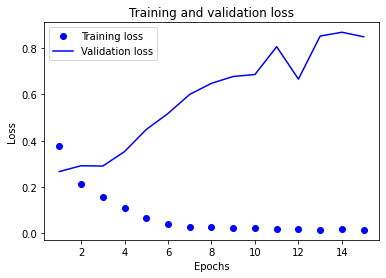

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

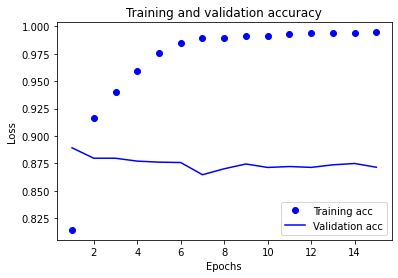

In [ ]:

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Build model...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 50)           250000    
                                                                 
 dropout_6 (Dropout)         (None, 400, 50)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 398, 250)          37750     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_7 (Dense)             (None, 250)               62750     
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                       

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_acc', mode='max')
callbacks_lst = [checkpoint]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
774/782 [============================>.] - ETA: 0s - loss: 0.4077 - accuracy: 0.7976

782/782 [==============================] - 8s 9ms/step - loss: 0.4064 - accuracy: 0.7984 - val_loss: 0.2771 - val_accuracy: 0.8854
Epoch 2/15
779/782 [============================>.] - ETA: 0s - loss: 0.2323 - accuracy: 0.9062

782/782 [==============================] - 9s 11ms/step - loss: 0.2325 - accuracy: 0.9062 - val_loss: 0.2602 - val_accuracy: 0.8918
Epoch 3/15
774/782 [============================>.] - ETA: 0s - loss: 0.1598 - accuracy: 0.9389

782/782 [==============================] - 7s 9ms/step - loss: 0.1606 - accuracy: 0.9388 - val_loss: 0.2684 - val_accuracy: 0.8886
Epoch 4/15
774/782 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9622

782/782 [==============================] - 7s 9ms/step - loss: 0.1062 - accuracy: 0.9622 - val_loss: 0.3208 - val_accuracy: 0.8810
Epoch 5/15
778/782 [============================>.] - ETA: 0s - loss: 0.0717 - accuracy: 0.9746

782/782 [==============================] - 7s 9ms/step - loss: 0.0717 - accuracy: 0.9746 - val_loss: 0.3517 - val_accuracy: 0.8864
Epoch 6/15
776/782 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9810

782/782 [==============================] - 6s 8ms/step - loss: 0.0541 - accuracy: 0.9810 - val_loss: 0.4098 - val_accuracy: 0.8792
Epoch 7/15
776/782 [============================>.] - ETA: 0s - loss: 0.0451 - accuracy: 0.9844

782/782 [==============================] - 6s 8ms/step - loss: 0.0458 - accuracy: 0.9843 - val_loss: 0.4545 - val_accuracy: 0.8781
Epoch 8/15
780/782 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9872

782/782 [==============================] - 7s 9ms/step - loss: 0.0359 - accuracy: 0.9871 - val_loss: 0.4942 - val_accuracy: 0.8798
Epoch 9/15
782/782 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9874

782/782 [==============================] - 6s 8ms/step - loss: 0.0326 - accuracy: 0.9874 - val_loss: 0.5532 - val_accuracy: 0.8678
Epoch 10/15
774/782 [============================>.] - ETA: 0s - loss: 0.0337 - accuracy: 0.9876

782/782 [==============================] - 6s 8ms/step - loss: 0.0337 - accuracy: 0.9876 - val_loss: 0.5012 - val_accuracy: 0.8811
Epoch 11/15
773/782 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9906

782/782 [==============================] - 7s 9ms/step - loss: 0.0261 - accuracy: 0.9906 - val_loss: 0.5510 - val_accuracy: 0.8804
Epoch 12/15
773/782 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.9912

782/782 [==============================] - 7s 9ms/step - loss: 0.0235 - accuracy: 0.9912 - val_loss: 0.5431 - val_accuracy: 0.8851
Epoch 13/15
779/782 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9910

782/782 [==============================] - 7s 9ms/step - loss: 0.0256 - accuracy: 0.9910 - val_loss: 0.5842 - val_accuracy: 0.8845
Epoch 14/15
775/782 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9915

782/782 [==============================] - 7s 9ms/step - loss: 0.0225 - accuracy: 0.9916 - val_loss: 0.5761 - val_accuracy: 0.8840
Epoch 15/15
774/782 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9916

782/782 [==============================] - 2s 3ms/step - loss: 0.5657 - accuracy: 0.8830
Test score: 0.565713107585907
Test accuracy: 0.8830400109291077


In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

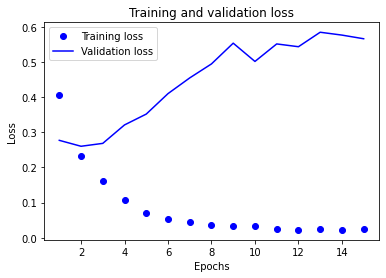

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

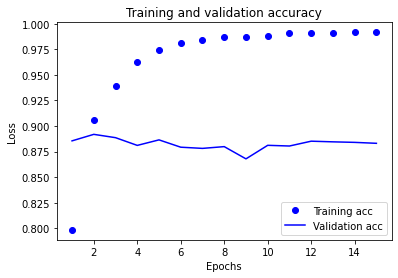

In [ ]:

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#CNN+LSTM

In [ ]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
#batch_size = 30
#epochs = 2
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [ ]:
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Build model...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 dropout_9 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 70)                37800     
                                                                 
 dense_10 (Dense)            (None, 1)                 71        
                                       

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_acc', mode='max')
callbacks_lst = [checkpoint]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 [==============================] - ETA: 0s - loss: 0.3848 - accuracy: 0.8189

782/782 [==============================] - 11s 10ms/step - loss: 0.3848 - accuracy: 0.8189 - val_loss: 0.3249 - val_accuracy: 0.8595
Epoch 2/15
778/782 [============================>.] - ETA: 0s - loss: 0.1982 - accuracy: 0.9248

782/782 [==============================] - 8s 10ms/step - loss: 0.1980 - accuracy: 0.9249 - val_loss: 0.3409 - val_accuracy: 0.8566
Epoch 3/15
779/782 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9658

782/782 [==============================] - 8s 10ms/step - loss: 0.0968 - accuracy: 0.9659 - val_loss: 0.4204 - val_accuracy: 0.8421
Epoch 4/15
782/782 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9866

782/782 [==============================] - 8s 10ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.5298 - val_accuracy: 0.8374
Epoch 5/15
781/782 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919

782/782 [==============================] - 7s 10ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.6523 - val_accuracy: 0.8343
Epoch 6/15
779/782 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9945

782/782 [==============================] - 8s 10ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.7807 - val_accuracy: 0.8352
Epoch 7/15
780/782 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9949

782/782 [==============================] - 8s 10ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.7554 - val_accuracy: 0.8339
Epoch 8/15
778/782 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9959

782/782 [==============================] - 7s 10ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.8254 - val_accuracy: 0.8374
Epoch 9/15
776/782 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9958

782/782 [==============================] - 7s 10ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.7762 - val_accuracy: 0.8341
Epoch 10/15
778/782 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.9965

782/782 [==============================] - 7s 10ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.8089 - val_accuracy: 0.8352
Epoch 11/15
776/782 [============================>.] - ETA: 0s - loss: 0.0093 - accuracy: 0.9966

782/782 [==============================] - 7s 9ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.8657 - val_accuracy: 0.8332
Epoch 12/15
775/782 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9978

782/782 [==============================] - 8s 10ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.9144 - val_accuracy: 0.8276
Epoch 13/15
782/782 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9974

782/782 [==============================] - 8s 10ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.9938 - val_accuracy: 0.8318
Epoch 14/15
781/782 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9982

782/782 [==============================] - 8s 10ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 1.1020 - val_accuracy: 0.8232
Epoch 15/15
782/782 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9984

782/782 [==============================] - 3s 3ms/step - loss: 1.1734 - accuracy: 0.8181
Test score: 1.1734490394592285
Test accuracy: 0.818120002746582


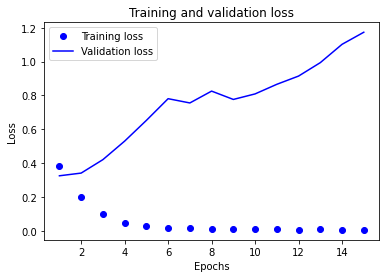

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

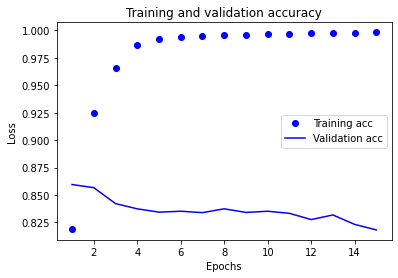

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
inputs1 = Input(shape=(maxlen,))
embedding1 = Embedding(max_features, embedding_size)(inputs1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
# channel 2
inputs2 = Input(shape=(maxlen,))
embedding2 = Embedding(max_features, embedding_size, input_length=maxlen)(inputs2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)
# channel 3
inputs3 = Input(shape=(maxlen,))
embedding3 = Embedding(max_features, embedding_size, input_length=maxlen)(inputs3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)
# merge
merged = concatenate([flat1, flat2, flat3])
# interpretation
dense1 = Dense(10, activation='relu')(merged)
outputs = Dense(1, activation='sigmoid')(dense1)
model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# summarize
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 100, 128)     2560000     ['input_1[0][0]']                
                                                                                              

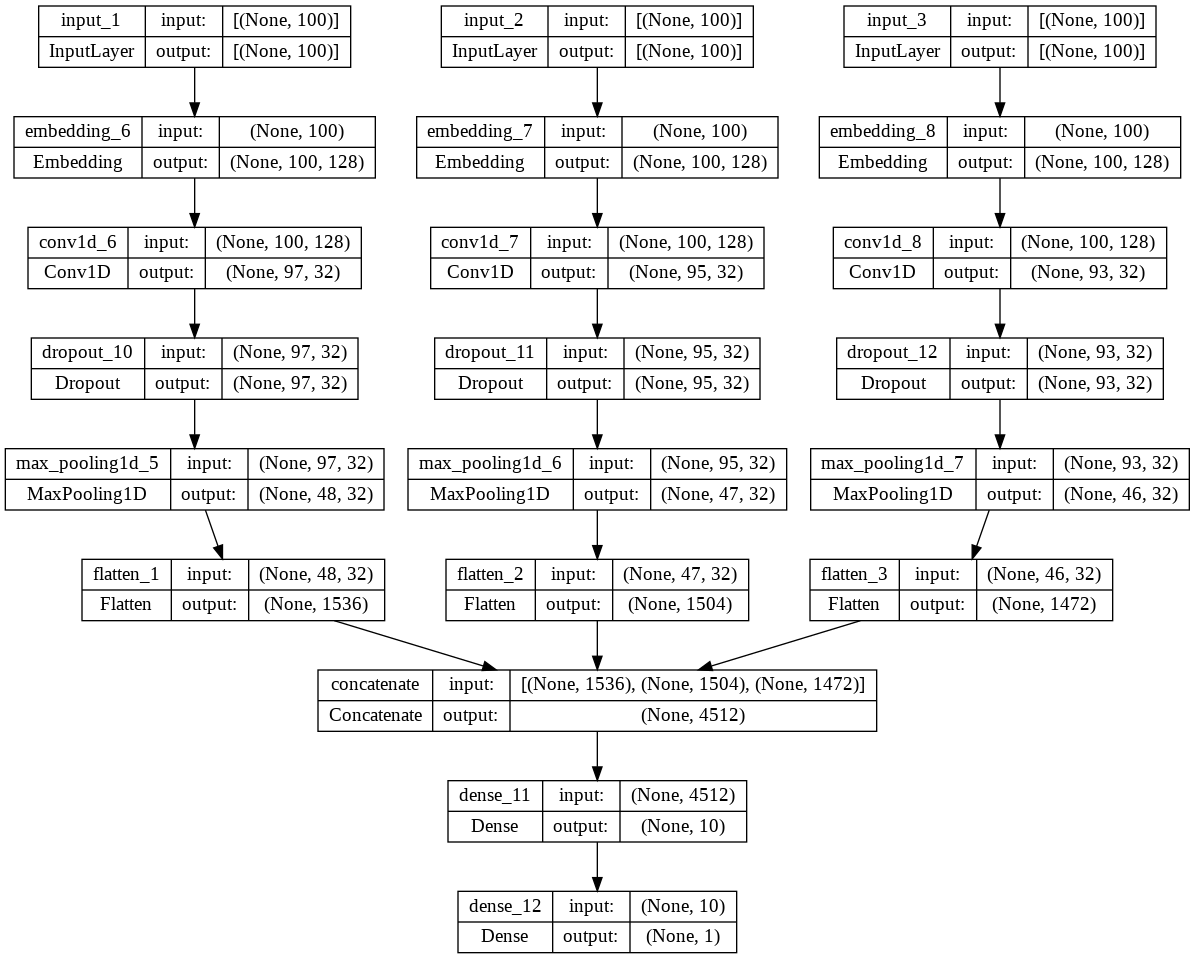

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='multichannel.png')

In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_acc', mode='max')
callbacks_lst = [checkpoint]

history = model.fit([x_train, x_train, x_train], y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=([x_test, x_test, x_test], y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate([x_test, x_test, x_test], y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 [==============================] - ETA: 0s - loss: 0.4748 - accuracy: 0.7486

782/782 [==============================] - 12s 13ms/step - loss: 0.4748 - accuracy: 0.7486 - val_loss: 0.3459 - val_accuracy: 0.8464
Epoch 2/15
778/782 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9247

782/782 [==============================] - 10s 13ms/step - loss: 0.1999 - accuracy: 0.9248 - val_loss: 0.3468 - val_accuracy: 0.8483
Epoch 3/15
779/782 [============================>.] - ETA: 0s - loss: 0.0484 - accuracy: 0.9866

782/782 [==============================] - 10s 13ms/step - loss: 0.0484 - accuracy: 0.9866 - val_loss: 0.4365 - val_accuracy: 0.8327
Epoch 4/15
780/782 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9986

782/782 [==============================] - 10s 13ms/step - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0.5402 - val_accuracy: 0.8357
Epoch 5/15
779/782 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994

782/782 [==============================] - 9s 12ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.6285 - val_accuracy: 0.8402
Epoch 6/15
777/782 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996

782/782 [==============================] - 9s 12ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.6998 - val_accuracy: 0.8358
Epoch 7/15
780/782 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9944

782/782 [==============================] - 10s 13ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.8094 - val_accuracy: 0.8276
Epoch 8/15
782/782 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9943

782/782 [==============================] - 9s 12ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.7819 - val_accuracy: 0.8242
Epoch 9/15
777/782 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9958

782/782 [==============================] - 9s 12ms/step - loss: 0.0110 - accuracy: 0.9958 - val_loss: 0.8332 - val_accuracy: 0.8318
Epoch 10/15
780/782 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9975

782/782 [==============================] - 9s 12ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.8695 - val_accuracy: 0.8287
Epoch 11/15
781/782 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9972

782/782 [==============================] - 9s 12ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.9266 - val_accuracy: 0.8299
Epoch 12/15
778/782 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9976

782/782 [==============================] - 9s 12ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.9592 - val_accuracy: 0.8301
Epoch 13/15
780/782 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9973

782/782 [==============================] - 10s 13ms/step - loss: 0.0073 - accuracy: 0.9973 - val_loss: 1.0708 - val_accuracy: 0.8180
Epoch 14/15
781/782 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9975

782/782 [==============================] - 9s 12ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 1.0350 - val_accuracy: 0.8281
Epoch 15/15
779/782 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9976

782/782 [==============================] - 3s 3ms/step - loss: 1.0246 - accuracy: 0.8295
Test score: 1.0246338844299316
Test accuracy: 0.829479992389679
